<a href="https://colab.research.google.com/github/ark150/PracticaSIDI2Semana1/blob/master/Tarea_de_SistDist2_semana_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##practica

In [0]:
import os
plantilla = 'yellow_tripdata_2018-{:02d}.csv'
plantillaURL = 'wget https://s3.amazonaws.com/nyc-tlc/trip+data/'+plantilla
urls = (plantillaURL.format(k) for k in range(1,13))
for url in urls:
  os.system(url)

In [0]:
import pandas as pd

In [0]:
df2 = pd.concat(map(pd.read_csv, ['yellow_tripdata_2018-01.csv', 'yellow_tripdata_2018-02.csv']))

In [8]:
df2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'tip_fraction', 'month', 'hour'],
      dtype='object')

In [0]:
df2['tip_fraction']= df2['tip_amount']/(df2['total_amount']-df2['tip_amount'])

In [0]:
df2['tpep_dropoff_datetime']= pd.to_datetime(df2['tpep_dropoff_datetime'])

In [0]:
df2['month']=df2['tpep_dropoff_datetime'].dt.month


In [0]:
df2['hour']=df2['tpep_dropoff_datetime'].dt.hour

In [0]:
enero = df2[df2.month==1]

In [0]:
febrero = df2[df2.month==2]

In [0]:
porHoraEnero =enero.groupby('hour')
porHoraFebrero =febrero.groupby('hour')

In [0]:
resultadoEnero = porHoraEnero['tip_fraction'].mean()
resultadoFebrero = porHoraFebrero['tip_fraction'].mean()
resultadototal = df2['tip_fraction'].mean()

In [0]:
import matplotlib.pyplot as plt

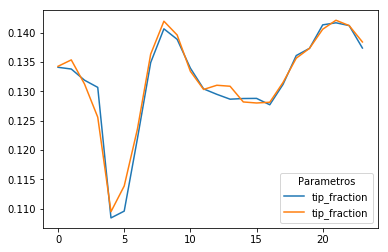

In [20]:

plt.plot(resultadoEnero)


plt.plot(resultadoFebrero)


plt.plot(resultadototal)

plt.legend(title='Parametros')
plt.show()

##ahora con dask


In [0]:
import dask.dataframe as dd

In [0]:
dd2 = dd.read_csv("yellow_tripdata_2018-*.csv", assume_missing=True)

In [0]:
dd2['tip_fraction']= dd2['tip_amount']/(dd2['total_amount']-dd2['tip_amount'])

In [0]:
dd2['tpep_dropoff_datetime']= dd.to_datetime(dd2['tpep_dropoff_datetime'])
dd2['hour']=dd2['tpep_dropoff_datetime'].dt.hour
dd2['month']=dd2['tpep_dropoff_datetime'].dt.month

In [0]:
enerod = dd2[dd2.month==1]
febrerod = dd2[dd2.month==2]

In [0]:
porHoraEnerod =enerod.groupby('hour')
porHoraFebrerod =febrerod.groupby('hour')

In [0]:
resultadoEnerod = porHoraEnerod['tip_fraction'].mean()
resultadoFebrerod = porHoraFebrerod['tip_fraction'].mean()

In [0]:
tip_fracEnero = resultadoEnerod.compute()
tip_fracFebrero = resultadoFebrerod.compute()

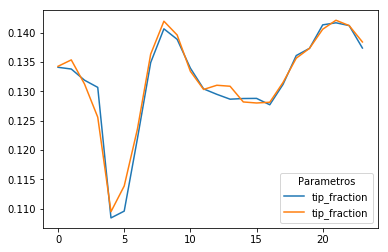

In [29]:
plt.plot(tip_fracEnero)

plt.plot(tip_fracFebrero)

plt.legend(title='Parametros')
plt.show()

posiciones globales

In [30]:
!wget http://s3.amazonaws.com/datashader-data/nyc_taxi.zip && unzip nyc_taxi.zip

--2019-06-18 06:37:35--  http://s3.amazonaws.com/datashader-data/nyc_taxi.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.237.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.237.165|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 432291366 (412M) [application/zip]
Saving to: ‘nyc_taxi.zip’

nyc_taxi.zip        100%[===================>] 412.26M  75.2MB/s    in 6.8s    

2019-06-18 06:37:42 (60.3 MB/s) - ‘nyc_taxi.zip’ saved [432291366/432291366]

Archive:  nyc_taxi.zip
  inflating: nyc_taxi.csv            


In [31]:
!wc nyc_taxi.csv

  10679308   32037922 1510609630 nyc_taxi.csv


In [4]:
%time df = pd.read_csv('nyc_taxi.csv', usecols=['dropoff_x', 'dropoff_y','pickup_x','pickup_y'])
df.tail()

CPU times: user 15.1 s, sys: 1.03 s, total: 16.1 s
Wall time: 16.1 s


,pickup_x,pickup_y,dropoff_x,dropoff_y
10679302,-8.232298e+06,4.980860e+06,-8.232492e+06,4.979234e+06
10679303,-8.235721e+06,4.972331e+06,-8.234857e+06,4.971131e+06
10679304,-8.235341e+06,4.975470e+06,-8.234203e+06,4.981092e+06
10679305,-8.237594e+06,4.973844e+06,-8.235618e+06,4.973722e+06
10679306,-8.233229e+06,4.977946e+06,-8.234152e+06,4.977120e+06


In [40]:
df.columns

Index(['pickup_x', 'pickup_y', 'dropoff_x', 'dropoff_y'], dtype='object')

In [0]:
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show

In [0]:
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))

plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

options = dict(line_color=None, fill_color='blue', size=5)

In [16]:
from bokeh.tile_providers import STAMEN_TERRAIN
output_notebook()
muestras = df.sample(n=1)
p= base_plot()
p.add_tile(STAMEN_TERRAIN)
p.circle(x=muestras['dropoff_x'], y=muestras['dropoff_y'], color="RED" )
p.triangle(x=muestras['pickup_x'], y=muestras['pickup_y'], **options )
show(p)

Loading BokehJS ...